# SIIM: Step-by-Step Image Detection for Beginners - Part 2. Modeling
...ing

Thanks for nice reference :

`load dataset(original image size info-)`
- [Resized to 256px JPG](https://www.kaggle.com/xhlulu/siim-covid19-resized-to-256px-jpg)

```
Step 1. Load Data and Trim for use
     1-a. load train-dataframe
     1-b. load meta-dataframe
     1-c. load image data array
     1-d. calculate image resize ratio information
     ....ing
```

## Step 1. Load Data and Trim for use

### 1-a. load train-dataframe

In [7]:
import pandas as pd

In [8]:
train_df = pd.read_csv('/kaggle/input/siimcovid19-train-data-that-opacitycount-added/train_df.csv')

In [9]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Path
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/57...
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,/kaggle/input/siim-covid19-detection//train/ff...
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/9d...
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,/kaggle/input/siim-covid19-detection//train/28...
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/df...


We don't use dcm file. drop 'path' column

In [10]:
train_df.drop(columns='Path', axis=1,inplace=True)

In [11]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0


And add 'Opacity' Column. The Value is 1 If Opacity detected, else 0

In [51]:
train_df['Opacity'] = train_df.apply(lambda row : 1 if row.label.split(' ')[0]=='opacity' else 0, axis=1)
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width,height_ratio,width_ratio
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1,3488,4256,0.073394,0.060150
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0,2320,2832,0.110345,0.090395
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1,2544,3056,0.100629,0.083770
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1,3520,4280,0.072727,0.059813
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1,2800,3408,0.091429,0.075117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0,4240,3480,0.060377,0.073563
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0,2800,3408,0.091429,0.075117
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1,2388,3050,0.107203,0.083934
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1,3488,4256,0.073394,0.060150


In [13]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,True
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,False
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,True
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,True
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,True
...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,False
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,False
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,True
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,True


### 1-b. load meta-dataframe

We need the size of the individual images. This is necessary later to calculate the ratio and find the coordinates of the box border to detect the opacity.

In [14]:
meta_df = pd.read_csv('/kaggle/input/siim-covid19-resized-to-256px-jpg/meta.csv')

In [15]:
meta_df.head()

,image_id,dim0,dim1,split
0,a29c5a68b07b,2320,2828,test
1,9850b5470fd6,2330,2382,test
2,8d6dea06a032,2422,3344,test
3,dfc5c09a50bc,1140,1387,test
4,7230234e120a,2318,2383,test


- Y(height) : `dim0` 
- X(width) : `dim1`


In [16]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  7597 non-null   object
 1   dim0      7597 non-null   int64 
 2   dim1      7597 non-null   int64 
 3   split     7597 non-null   object
dtypes: int64(2), object(2)
memory usage: 237.5+ KB


In [17]:
meta_df.split.unique()

array(['test', 'train'], dtype=object)

In [55]:
import warnings
warnings.filterwarnings(action='ignore')

In [56]:
train_meta_df = meta_df.loc[meta_df.split=='train']
train_meta_df.drop('split',axis=1,inplace=True)
train_meta_df.columns = ['id', 'origin_img_height','origin_img_width']
train_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 1263 to 7596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 6334 non-null   object
 1   origin_img_height  6334 non-null   int64 
 2   origin_img_width   6334 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 197.9+ KB


In [19]:
train_meta_df

,id,origin_img_height,origin_img_width
1263,d8ba599611e5,2336,2836
1264,29b23a11d1e4,3488,4256
1265,8174f49500a5,2330,2846
1266,d54f6204b044,2330,2846
1267,d51cadde8626,3488,4256
...,...,...,...
7592,729eca7b4c1c,2539,3050
7593,39d52f244db3,2320,2832
7594,d342f75ccb55,2320,2832
7595,0f0b5a304a47,2320,2832


In [20]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,True
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,False
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,True
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,True
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,True


In [21]:
# test lambda
train_df['id'].apply(lambda x : x.split('_')[0])


0       000a312787f2
1       000c3a3f293f
2       0012ff7358bc
3       001398f4ff4f
4       001bd15d1891
            ...     
6329    ffcc6edd9445
6330    ffd91a2c4ca0
6331    ffd9b6cf2961
6332    ffdc682f7680
6333    ffe942c8655f
Name: id, Length: 6334, dtype: object

In [22]:
train_df['id'] = train_df['id'].apply(lambda x : x.split('_')[0])

In [23]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,True
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,False
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,True
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,True
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,True


In [24]:
train_df = pd.merge(train_df, train_meta_df, on='id')

In [25]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,True,3488,4256
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,False,2320,2832
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,True,2544,3056
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,True,3520,4280
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,True,2800,3408


### 1-c. load image data array

In [26]:
path = '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/'
train_imgs_path = list(train_df['id'].apply(lambda x : path + x + '.jpg').values)
train_imgs_path[:10]

['/kaggle/input/siim-covid19-resized-to-256px-jpg/train/000a312787f2.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/000c3a3f293f.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0012ff7358bc.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/001398f4ff4f.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/001bd15d1891.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0022227f5adf.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0023f02ae886.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/002e9b2128d0.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/00326161e51e.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0044e449aae1.jpg']

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as Image

In [28]:
img = Image.imread(train_imgs_path[0])

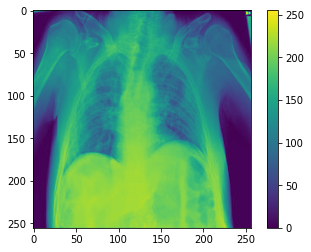

In [29]:
plt.imshow(img)
plt.colorbar()
plt.show();

In [30]:
img

array([[196, 194, 192, ...,   1,   5,  13],
       [166, 158, 147, ...,  10,   8,   5],
       [ 91,  82,  70, ...,  98, 226,  56],
       ...,
       [  3,   3,   3, ...,   2,   2,   2],
       [  3,   3,   3, ...,   2,   2,   2],
       [  3,   3,   3, ...,   2,   2,   2]], dtype=uint8)

In [31]:
import numpy as np

In [32]:
img.shape

(256, 256)

In [33]:
train_imgs = []
for img_path in train_imgs_path:
    img = Image.imread(img_path)
    train_imgs.append(img)

In [34]:
train_imgs = np.array(train_imgs)

add Channel (3dim to 4dim, gray)

In [35]:
train_imgs = train_imgs.reshape(6334,256,256,1)

In [36]:
train_imgs.shape

(6334, 256, 256, 1)

In [37]:
len(train_imgs)

6334

In [38]:
min(train_imgs[0].reshape(-1)), max(train_imgs[0].reshape(-1))

(0, 255)

In [39]:
min(train_imgs[13].reshape(-1)), max(train_imgs[13].reshape(-1))

(0, 255)

### 1-d. calculate image resize ratio information

In [40]:
train_df['origin_img_height']

0       3488
1       2320
2       2544
3       3520
4       2800
        ... 
6329    4240
6330    2800
6331    2388
6332    3488
6333    1140
Name: origin_img_height, Length: 6334, dtype: int64

In [46]:
train_df['height_ratio'] = train_df['origin_img_height'].apply(lambda x : 255/x)
train_df['height_ratio']

0       0.073394
1       0.110345
2       0.100629
3       0.072727
4       0.091429
          ...   
6329    0.060377
6330    0.091429
6331    0.107203
6332    0.073394
6333    0.224561
Name: height_ratio, Length: 6334, dtype: float64

In [47]:
train_df['origin_img_width']

0       4256
1       2832
2       3056
3       4280
4       3408
        ... 
6329    3480
6330    3408
6331    3050
6332    4256
6333    1387
Name: origin_img_width, Length: 6334, dtype: int64

In [53]:
train_df['width_ratio'] = train_df['origin_img_width'].apply(lambda x : 255/x)
train_df['width_ratio']

0       0.059915
1       0.090042
2       0.083442
3       0.059579
4       0.074824
          ...   
6329    0.073276
6330    0.074824
6331    0.083607
6332    0.059915
6333    0.183850
Name: width_ratio, Length: 6334, dtype: float64

In [54]:
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width,height_ratio,width_ratio
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1,3488,4256,0.073394,0.059915
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0,2320,2832,0.110345,0.090042
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1,2544,3056,0.100629,0.083442
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1,3520,4280,0.072727,0.059579
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1,2800,3408,0.091429,0.074824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0,4240,3480,0.060377,0.073276
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0,2800,3408,0.091429,0.074824
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1,2388,3050,0.107203,0.083607
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1,3488,4256,0.073394,0.059915
